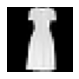

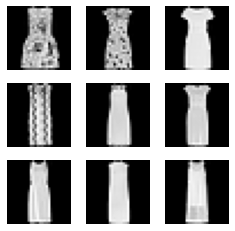

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
import random 
import matplotlib
import matplotlib.pyplot as plt

# data preparation
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Data Normalization [0,1]
train_images = train_images / 255.0
test_images  = test_images / 255.0

# Reshape
train_images = tf.reshape(train_images, (60000, 28, 28, 1))
test_images  = tf.reshape(test_images, (10000, 28, 28, 1))

# set up model
def VGG():
    model = Sequential()
    model.add(Convolution2D(64, 3, padding='same', activation='relu', input_shape=(28,28, 1)))
    model.add(Convolution2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(128, 3, padding='same', activation='relu'))
    model.add(Convolution2D(128, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

model = VGG()

# load query from test data
query_np = test_images[random.randint(0, test_images.shape[0])] #(28, 28, 1)
query_np = np.expand_dims(query_np, axis=0)  #(1, 28, 28, 1)
query_features = model.predict(query_np)

fig = plt.figure(figsize=(1.2, 1.2))
plt.axis('off')
plt.imshow(np.reshape(query_np,(28, 28)), cmap='gray')

# load data from train data
data = train_images
data_features = model.predict(data)

# compute similarity
query_features = np.reshape(query_features, (1, -1))
data_features  = np.reshape(data_features, (data.shape[0], -1))
sims = cosine_similarity(query_features, data_features).squeeze()

# sorting the similarity
def getKey(item):
    return item[0]

lists = [i for i in range(data.shape[0])]
tps = zip(sims.tolist(), lists)
tps_sorted = sorted(tps, key=getKey, reverse=True)

# graph
fig = plt.figure(figsize=(4,4))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    index = tps_sorted[i-1][1]
    img = train_images[index]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(np.reshape(img,(28, 28)), cmap='gray')